<span style="font-size: 24px">Lab 4</span>

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Определяем параметры стиля для черной темы
font_color = (1.0, 1.0, 1.0)
fig_color = (0.0, 0.0, 0.0)
subplot_color = (0.05, 0.05, 0.05)

line_color = (1.0, 1.0, 1.0)
gray_color = (0.5, 0.5, 0.5)
light_gray_color = (0.6, 0.6, 0.6)

point_color_1 = (0.25, 0.5, 1.0)
point_color_2 = (0.5, 0.75, 1.0)

lit_fontsize = 9
big_fontsize = 12
title_fontsize = 15

yellow_color = np.array([0.8, 0.8, 0.0])
green_color = np.array([0.25, 0.75, 0.25])
blue_color = np.array([0.0, 0.25, 1.0]) 
red_color = np.array([0.8, 0.0, 0.0])

skyblue_color = np.array([0.5, 0.75, 1.0])

# Мой стиль
black_style = {
    'axes.facecolor': subplot_color,              # Цвет фона осей
    'axes.edgecolor': font_color,                 # Цвет границ осей
    'axes.titlesize': title_fontsize,
    'axes.titleweight': 'bold',
    'axes.titlecolor': font_color,
    'axes.labelsize': title_fontsize,
    'axes.labelweight': 'bold',
    'axes.labelcolor': font_color,
    'axes.grid': True,                            # Включение сетки
    'grid.color': gray_color,                     # Цвет сетки
    'grid.alpha': 0.5,                            # Прозрачность сетки
    'xtick.color': font_color,                    # Цвет меток на оси x
    'ytick.color': font_color,                    # Цвет меток на оси y
    'figure.facecolor': fig_color,          # Цвет фона фигуры
    'figure.edgecolor': fig_color,          # Цвет границы фигуры
    'lines.linewidth': 3,
    'legend.fontsize': lit_fontsize,
    'legend.labelcolor': font_color,
    'legend.facecolor': fig_color, 
    'legend.edgecolor': fig_color,
}

# Применяем стиль
plt.style.use(black_style)

def grad_colors(n_colors, color_1, color_2):
    return [color_1 + (color_2 - color_1) * i / (n_colors - 1) for i in range(n_colors)]

1

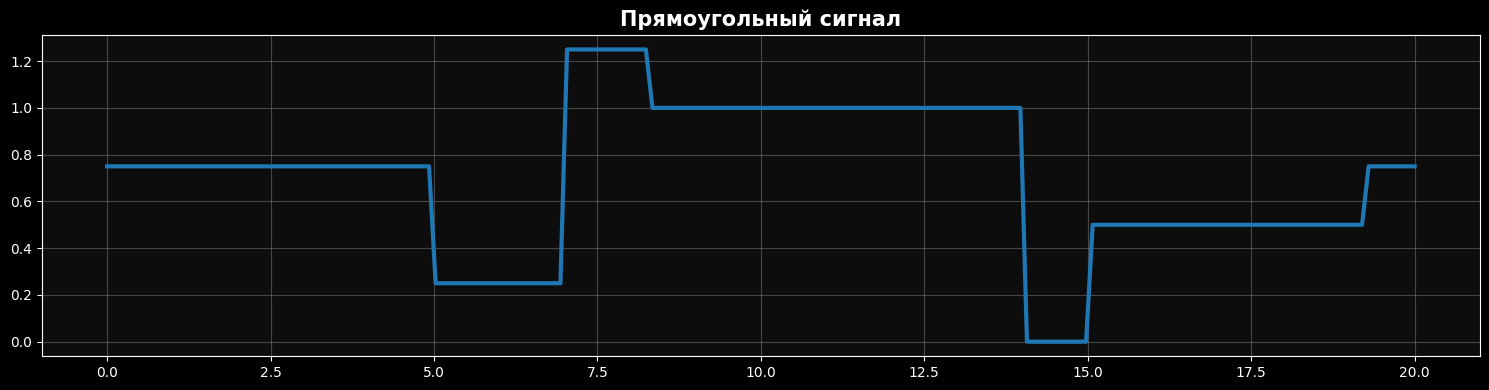

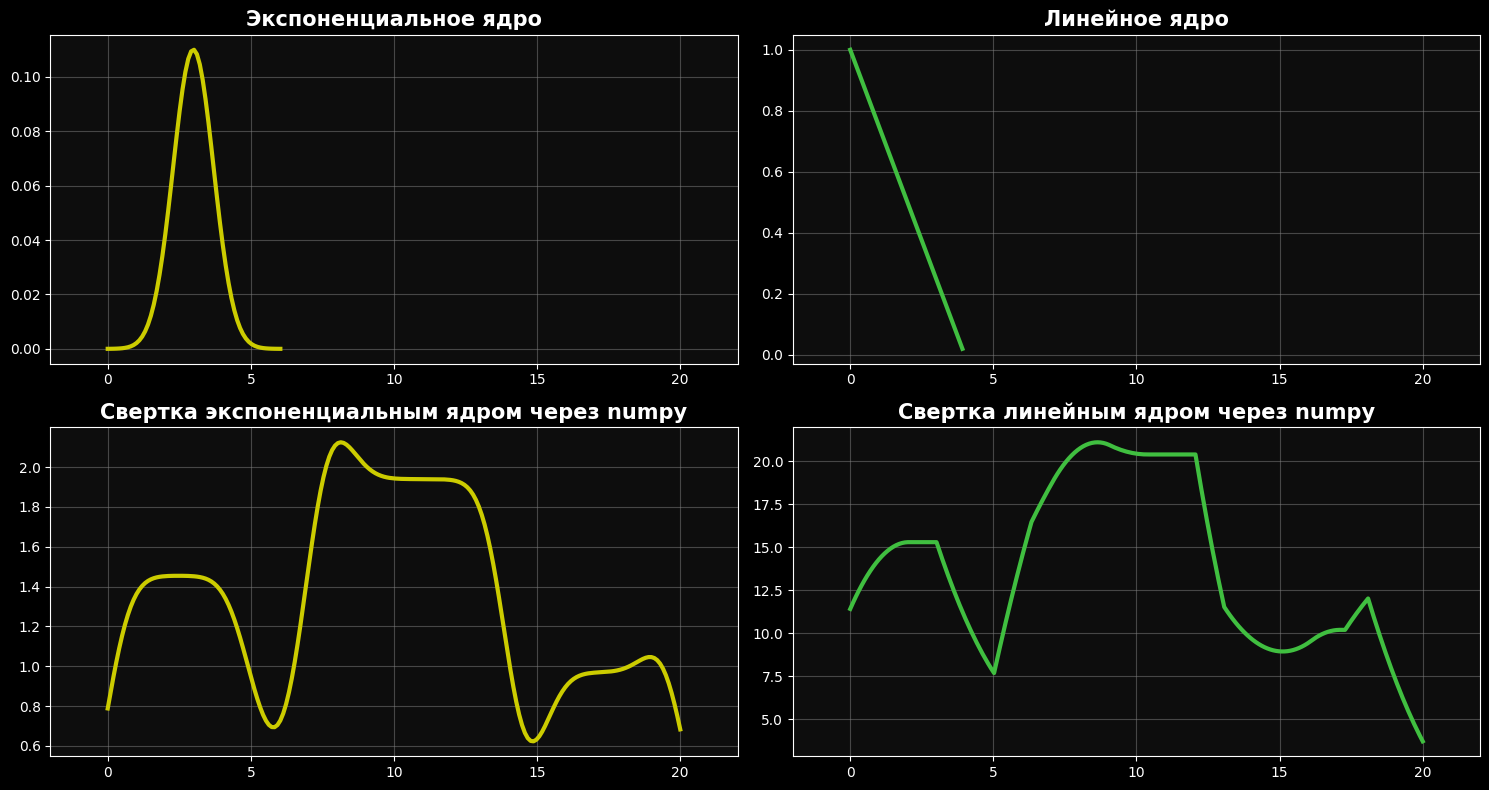

In [160]:


# Параметры
a = 0
b = 20

sampling_frequency = 10 * (b - a)
epsilon = 1e-5

# Определение параметров для нескольких сигналов
amplitude1 = 1/2
amplitude2 = 1/4
amplitude3 = 1/8

period1 = 14
period2 = 20
period3 = 22

shift1 = np.pi
shift2 = np.pi / 2
shift3 = np.pi / 4

# Сложный прямоугольный сигнал
t = np.linspace(a, b, sampling_frequency)

mini_rect_signal_1 = amplitude1 * signal.square(2 * np.pi * t / period1 + shift1) + amplitude1
mini_rect_signal_2 = amplitude2 * signal.square(2 * np.pi * t / period2 + shift2) + amplitude2
mini_rect_signal_3 = amplitude3 * signal.square(2 * np.pi * t / period3 + shift3) + amplitude3

rect_signal = mini_rect_signal_1 + mini_rect_signal_2 + mini_rect_signal_3

# Линейное и экспоненциальное ядро
x1_linear_k, x2_linear_k = (0, 1), (4, 0)
amp_exp_k = 0.11

m_linear_k = (x2_linear_k[1] - x1_linear_k[1]) / (x2_linear_k[0] - x1_linear_k[0])
b_linear_k = x2_linear_k[1] - m_linear_k * x2_linear_k[0]
linear_function_t = m_linear_k * t + b_linear_k
linear_kernel = [y for y in linear_function_t if y >= 0]
t_linear_kernel = t[:len(linear_kernel)]

z = -np.log(epsilon)
x0_exp_k = epsilon + np.sqrt(z)
exp_function_t = amp_exp_k * np.exp(-(t - x0_exp_k)**2)
exp_kernel = [y for y in exp_function_t if y >= epsilon]
t_exp_kernel = t[:len(exp_kernel)]

# Свертка с использованием numpy
conv_exp = np.convolve(rect_signal, exp_kernel, mode='same')
conv_linear = np.convolve(rect_signal, linear_kernel, mode='same')


# Построение графиков
delta_add_x = np.abs(b - a) / 10
x_lim_lt, x_lim_rt = a - delta_add_x, b + delta_add_x

# Исходный сигнал
plt.figure(figsize=(15, 4))
plt.plot(t, rect_signal)
plt.title("Прямоугольный сигнал")
plt.tight_layout()
plt.show()

# Экспоненциальное ядро и Линейное ядро
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
(ax1, ax2), (ax3, ax4) = axes

ax1.plot(t_exp_kernel, exp_kernel, color=yellow_color)
ax1.set_title("Экспоненциальное ядро")
ax1.set_xlim(x_lim_lt, x_lim_rt)

ax2.plot(t_linear_kernel, linear_kernel, color=green_color)
ax2.set_title("Линейное ядро")
ax2.set_xlim(x_lim_lt, x_lim_rt)

ax3.plot(t, conv_exp, color=yellow_color)
ax3.set_title("Свертка экспоненциальным ядром через numpy")
ax3.set_xlim(x_lim_lt, x_lim_rt)

ax4.plot(t, conv_linear, color=green_color)
ax4.set_title("Свертка линейным ядром через numpy")
ax4.set_xlim(x_lim_lt, x_lim_rt)

plt.tight_layout()
plt.show()


2

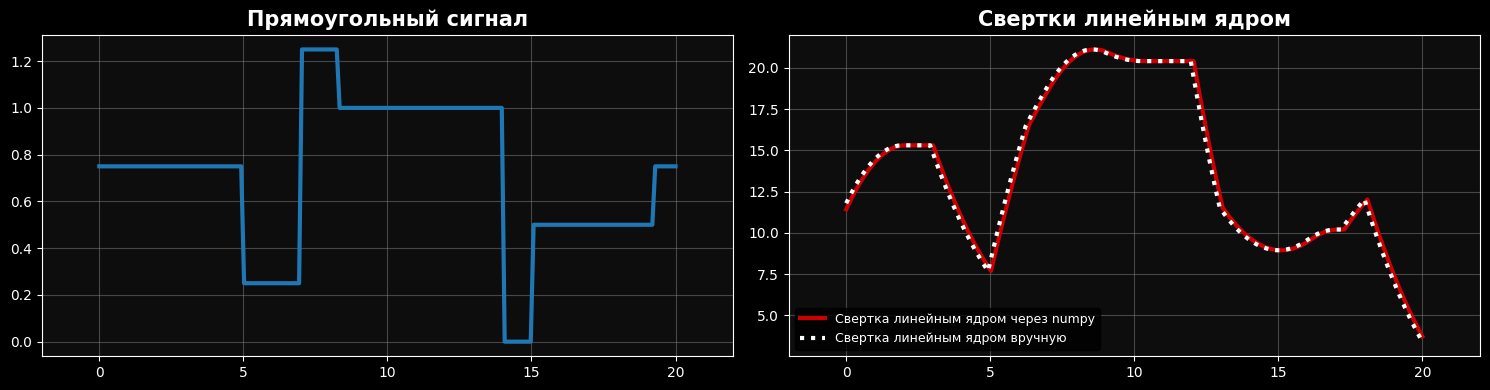

In [161]:
# Функция для свертки вручную
def manual_convolve(signal, kernel, t):
    output = np.zeros(len(signal) + len(kernel))
    for i in range(len(output)):
        for j in range(len(kernel)):
            if (i - j) >= 0 and (i - j) < len(signal):
                output[i] += signal[i - j] * kernel[j]
                
    manual_conv = output[len(kernel)//2:len(output)-len(kernel)//2]
    return manual_conv[:len(t)]


# Свертка вручную
manual_conv_linear = manual_convolve(rect_signal, linear_kernel, t)


# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
(ax1, ax2) = axes

ax1.plot(t, rect_signal)
ax1.set_title("Прямоугольный сигнал")
ax1.set_xlim(x_lim_lt, x_lim_rt)

ax2.plot(t, conv_linear, color=red_color, label="Свертка линейным ядром через numpy")
ax2.plot(t, manual_conv_linear, ":", color=font_color, label="Свертка линейным ядром вручную")
ax2.set_title("Свертки линейным ядром")
ax2.set_xlim(x_lim_lt, x_lim_rt)

plt.legend()
plt.tight_layout()
plt.show()


3

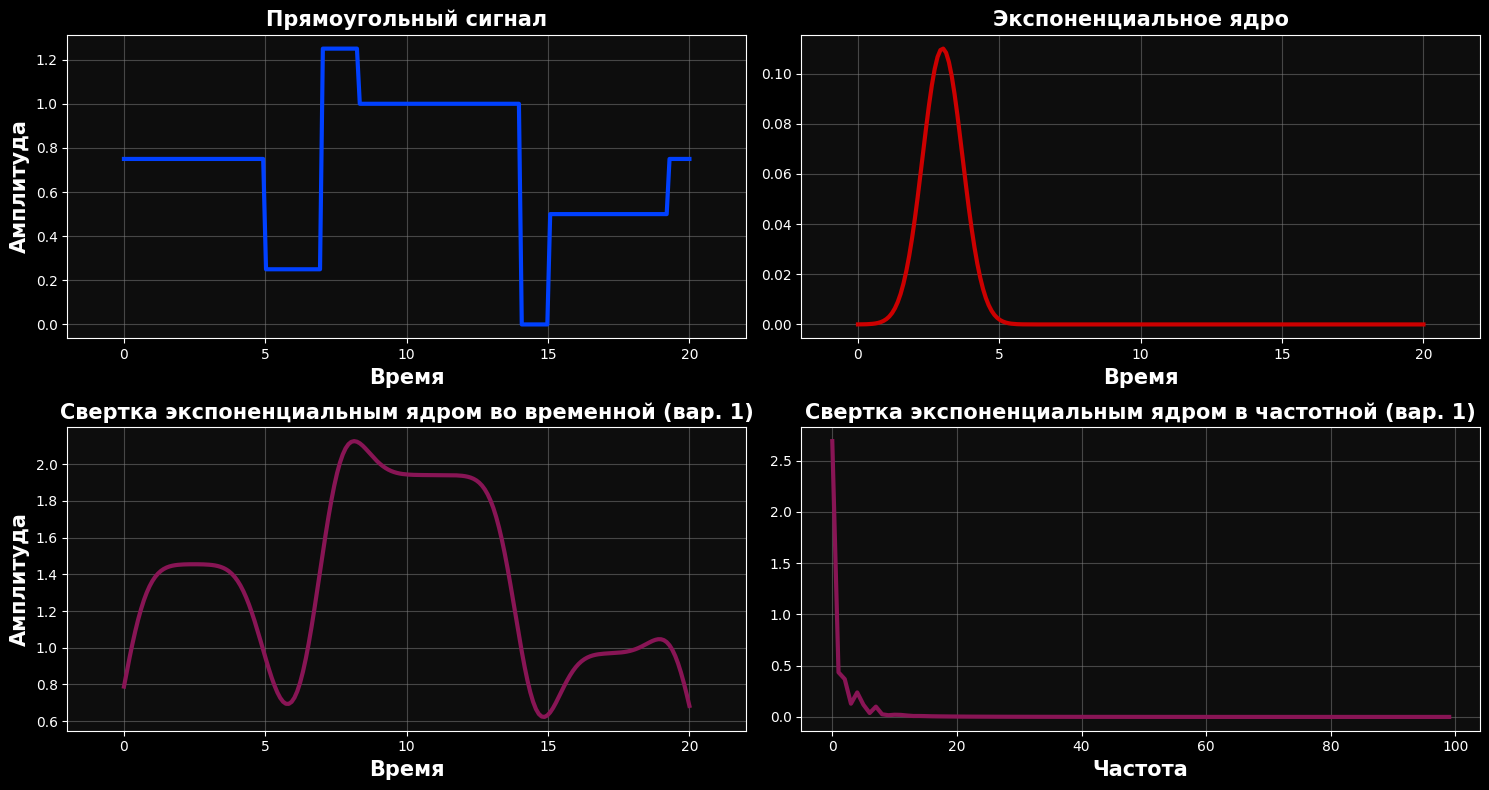

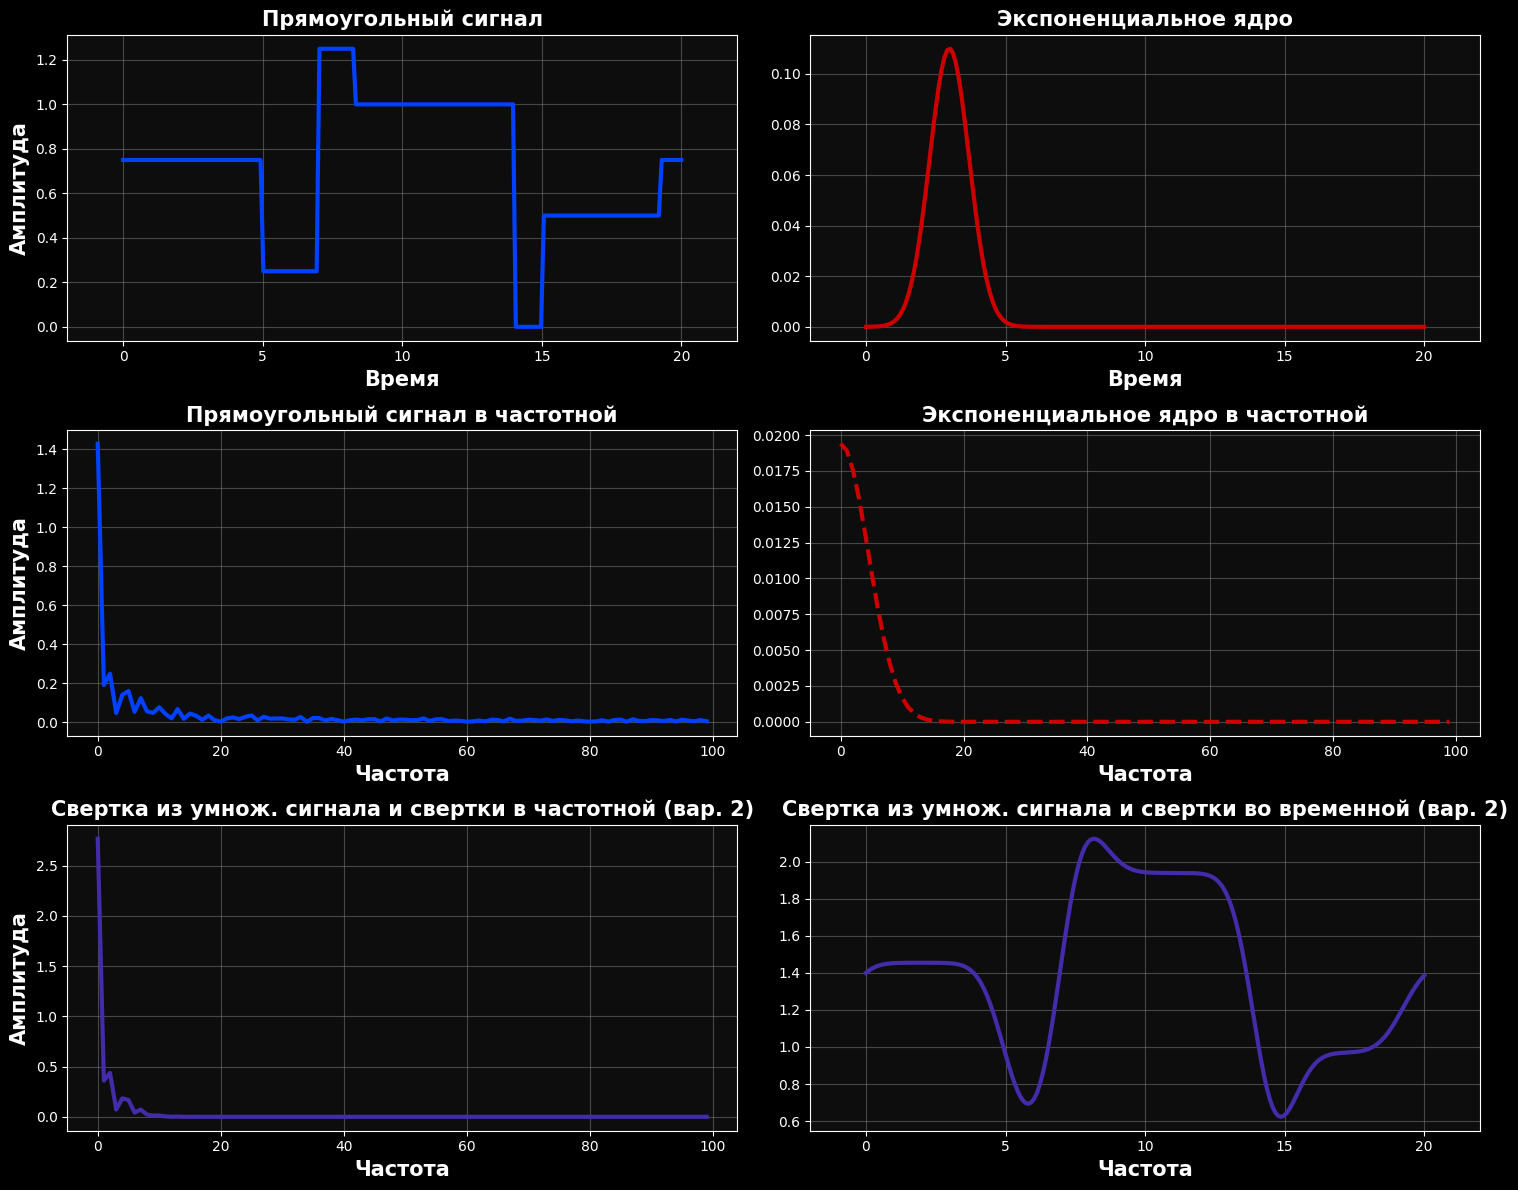

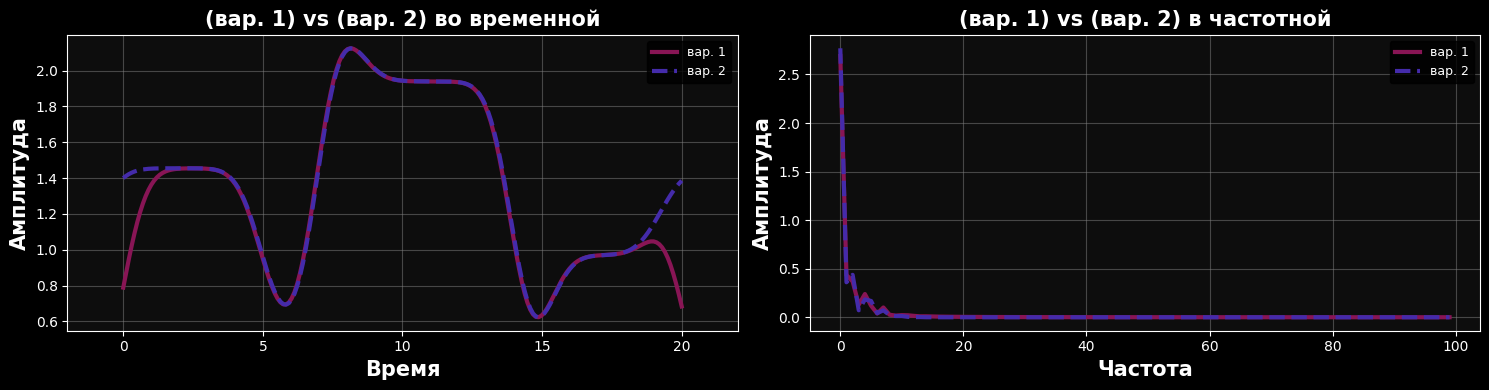

In [162]:
frequencies = np.fft.fftfreq(len(t), 1/sampling_frequency)

# Дополнение нулями ядро для приведения к одной длине (t)
exp_kernel_equal = np.pad(exp_kernel, (0, len(rect_signal) - len(exp_kernel)), 'constant')

# Вариант 1: Свертка во временной области через мою функцию
conv_exp_equal_1 = manual_convolve(rect_signal, exp_kernel, t)
conv_exp_fft_1 = np.fft.fft(conv_exp_equal_1)

# Вариант 2: Свертка в частотной области через fft
rect_signal_fft = np.fft.fft(rect_signal)
exp_kernel_fft = np.fft.fft(exp_kernel_equal)

conv_exp_fft_2 = rect_signal_fft * np.abs(exp_kernel_fft)
conv_exp_equal_2 = np.fft.ifft(conv_exp_fft_2).real


# Построение графиков
grad_red_blue_colors = grad_colors(4, red_color, blue_color)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
(ax1, ax2), (ax3, ax4) = axes

ax1.plot(t, rect_signal, color=blue_color)
ax1.set_title("Прямоугольный сигнал")
ax1.set_xlim(x_lim_lt, x_lim_rt)
ax1.set_xlabel("Время")
ax1.set_ylabel("Амплитуда")

ax2.plot(t, exp_kernel_equal, color=red_color)
ax2.set_title("Экспоненциальное ядро")
ax2.set_xlim(x_lim_lt, x_lim_rt)
ax2.set_xlabel("Время")

ax3.plot(t, conv_exp_equal_1, color=grad_red_blue_colors[1])
ax3.set_title("Свертка экспоненциальным ядром во временной (вар. 1)")
ax3.set_xlim(x_lim_lt, x_lim_rt)
ax3.set_xlabel("Время")
ax3.set_ylabel("Амплитуда")

ax4.plot(frequencies[:len(frequencies)//2], np.abs(conv_exp_fft_1[:len(conv_exp_fft_1)//2]) * 2 / len(t), color=grad_red_blue_colors[1])
ax4.set_title("Свертка экспоненциальным ядром в частотной (вар. 1)")
ax4.set_xlabel("Частота")

plt.tight_layout()
plt.show()

# Построение графиков
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axes

ax1.plot(t, rect_signal, color=blue_color)
ax1.set_title("Прямоугольный сигнал")
ax1.set_xlim(x_lim_lt, x_lim_rt)
ax1.set_xlabel("Время")
ax1.set_ylabel("Амплитуда")

ax2.plot(t, exp_kernel_equal, color=red_color)
ax2.set_title("Экспоненциальное ядро")
ax2.set_xlim(x_lim_lt, x_lim_rt)
ax2.set_xlabel("Время")

ax3.plot(frequencies[:len(frequencies)//2], np.abs(rect_signal_fft[:len(rect_signal_fft)//2]) * 2 / len(t), color=blue_color)
ax3.set_title("Прямоугольный сигнал в частотной")
ax3.set_xlabel("Частота")
ax3.set_ylabel("Амплитуда")

ax4.plot(frequencies[:len(frequencies)//2], np.abs(exp_kernel_fft[:len(exp_kernel_fft)//2]) * 2 / len(t), "--", color=red_color)
ax4.set_title("Экспоненциальное ядро в частотной")
ax4.set_xlabel("Частота")

ax5.plot(frequencies[:len(frequencies)//2], np.abs(conv_exp_fft_2[:len(conv_exp_fft_2)//2]) * 2 / len(t), color=grad_red_blue_colors[2])
ax5.set_title("Свертка из умнож. сигнала и свертки в частотной (вар. 2)")
ax5.set_xlabel("Частота")
ax5.set_ylabel("Амплитуда")

ax6.plot(t, conv_exp_equal_2, color=grad_red_blue_colors[2])
ax6.set_title("Свертка из умнож. сигнала и свертки во временной (вар. 2)")
ax6.set_xlabel("Частота")
ax6.set_xlim(x_lim_lt, x_lim_rt)

plt.tight_layout()
plt.show()

# Вывод различий
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
(ax1, ax2) = axes

ax1.plot(t, conv_exp_equal_1, color=grad_red_blue_colors[1], label="вар. 1")
ax1.plot(t, conv_exp_equal_2, "--", color=grad_red_blue_colors[2], label="вар. 2")
ax1.set_title("(вар. 1) vs (вар. 2) во временной")
ax1.set_xlim(x_lim_lt, x_lim_rt)
ax1.set_xlabel("Время")
ax1.set_ylabel("Амплитуда")
ax1.legend()

ax2.plot(frequencies[:len(frequencies)//2], np.abs(conv_exp_fft_1[:len(conv_exp_fft_1)//2]) * 2 / len(t), color=grad_red_blue_colors[1], label="вар. 1")
ax2.plot(frequencies[:len(frequencies)//2], np.abs(conv_exp_fft_2[:len(conv_exp_fft_2)//2]) * 2 / len(t), "--", color=grad_red_blue_colors[2], label="вар. 2")
ax2.set_title("(вар. 1) vs (вар. 2) в частотной")
ax2.set_xlabel("Частота")
ax2.set_ylabel("Амплитуда")
ax2.legend()

plt.tight_layout()
plt.show()


4

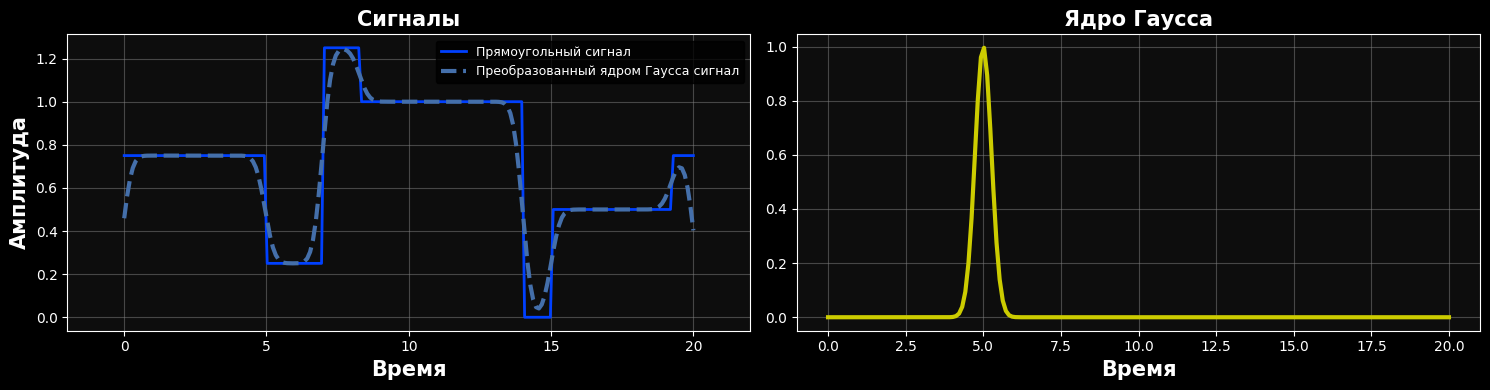

In [163]:
# Преобразуем сигнал во временной области

# Генерация ядра Гаусса
def function_gaussian_kernel(h, p, w):
  s = (w * (2 * np.pi - 1)) / (4 * np.pi)
  g = np.exp(-5 * ((h - p) / s)**2)
  return g

h = t # Частоты
p = 5  # Частота пика
w = 2  # Полная ширина на полувысоте Гауссианы, то есть сглаживание
gaussian_function_t = function_gaussian_kernel(h, p, w)
gaussian_kernel = [y for y in gaussian_function_t if y >= epsilon] # Убираю нулевые значения чтобы ядро стало меньше сигнала
gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel) # Нормализую ядро Гаусса

# Свертка сигнала с ядром Гаусса
smoothed_signal = np.convolve(rect_signal, gaussian_kernel, mode='same')
smoothed_signal_fft_from_signal = np.fft.fft(smoothed_signal)


# Построение графиков
grad_yellow_blue_colors = grad_colors(4, blue_color, yellow_color)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
(ax1, ax2) = axes

ax1.plot(t, rect_signal, color=grad_yellow_blue_colors[0], label="Прямоугольный сигнал", linewidth=2)
ax1.plot(t, smoothed_signal, "--", color=grad_yellow_blue_colors[1], label="Преобразованный ядром Гаусса сигнал")
ax1.set_title("Сигналы")
ax1.set_xlim(x_lim_lt, x_lim_rt)
ax1.set_xlabel("Время")
ax1.set_ylabel("Амплитуда")
ax1.legend()

ax2.plot(t, gaussian_function_t, color=grad_yellow_blue_colors[-1])
ax2.set_title("Ядро Гаусса")
ax2.set_xlabel("Время")

plt.tight_layout()
plt.show()

5

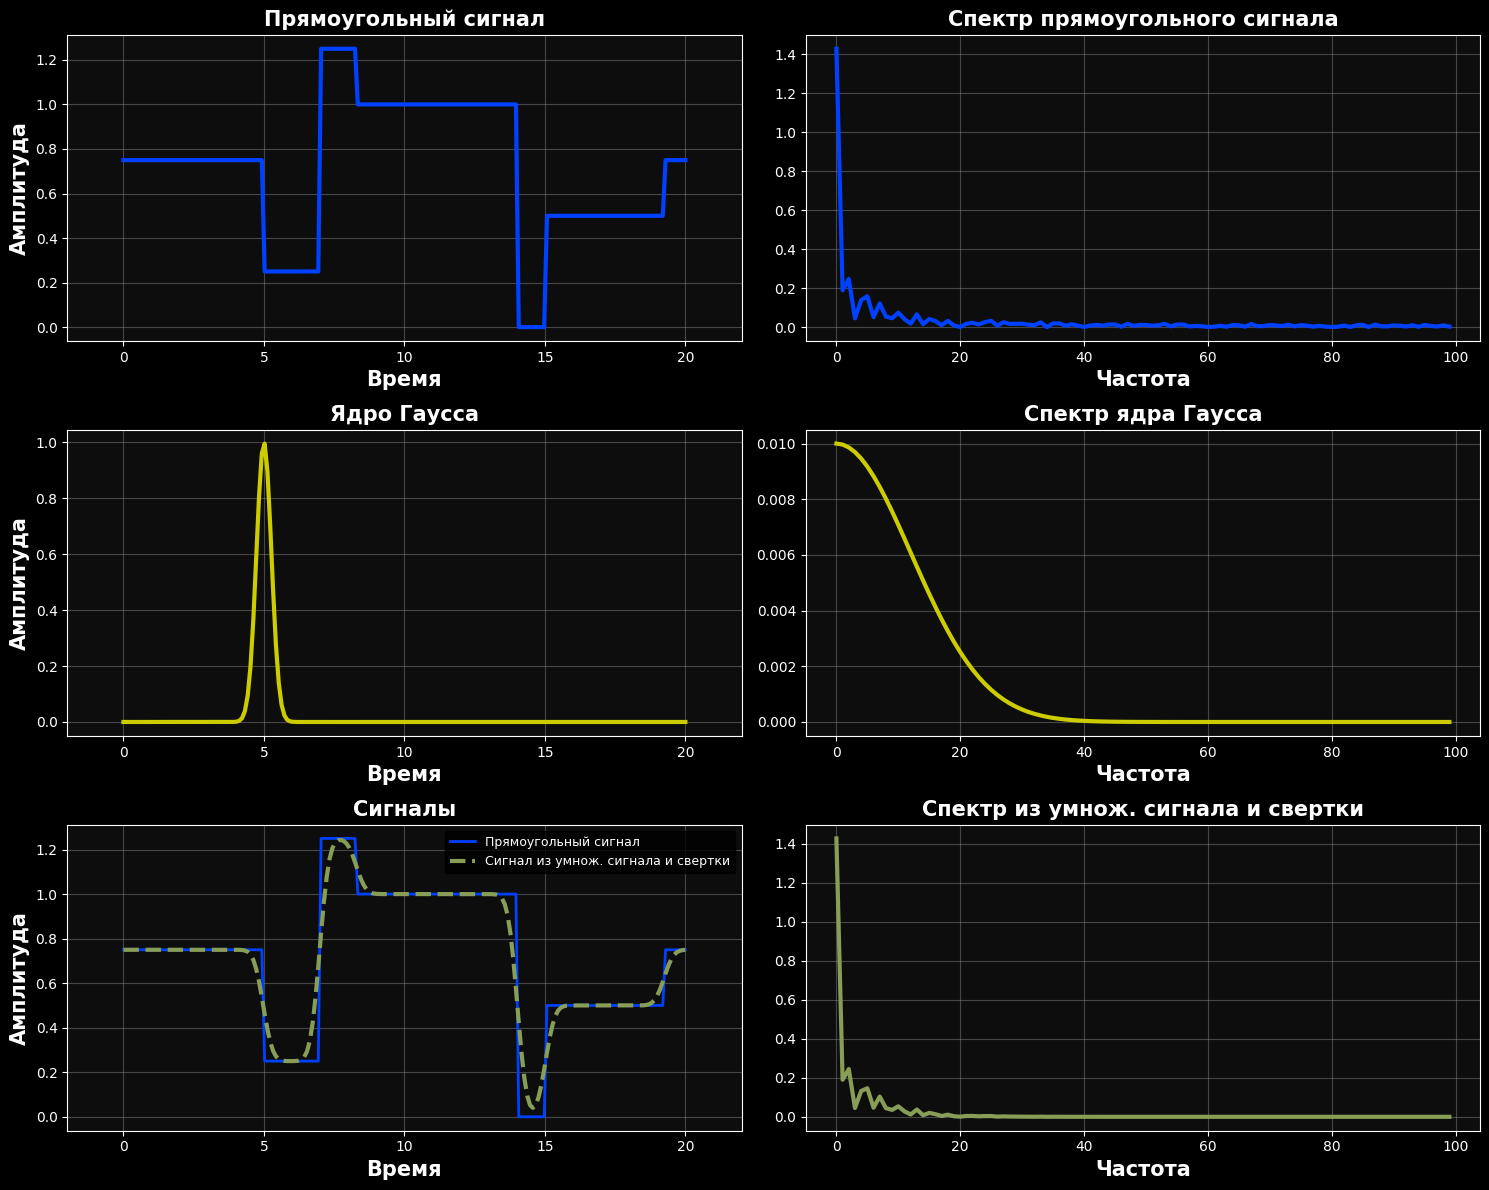

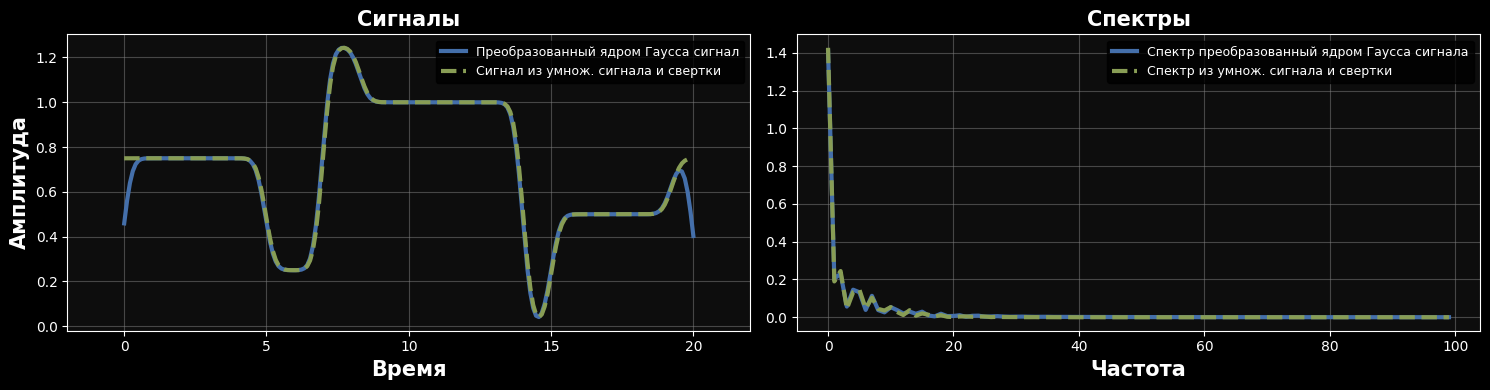

In [164]:
gaussian_kernel_t = gaussian_function_t / np.sum(gaussian_function_t) # Нормализую полноразмернное ядро Гаусса

# Аналогично делаем в частотной области
gaussian_kernel_fft = np.fft.fft(gaussian_kernel_t)

smoothed_signal_fft = rect_signal_fft * abs(gaussian_kernel_fft)
smoothed_signal_from_fft = np.fft.ifft(smoothed_signal_fft).real


# Построение графиков
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axes

ax1.plot(t, rect_signal, color=grad_yellow_blue_colors[0])
ax1.set_title("Прямоугольный сигнал")
ax1.set_xlim(x_lim_lt, x_lim_rt)
ax1.set_xlabel("Время")
ax1.set_ylabel("Амплитуда")

ax2.plot(frequencies[:len(frequencies)//2], np.abs(rect_signal_fft[:len(rect_signal_fft)//2]) * 2 / len(t), color=grad_yellow_blue_colors[0])
ax2.set_title("Спектр прямоугольного сигнала")
ax2.set_xlabel("Частота")

ax3.plot(t, gaussian_function_t, color=grad_yellow_blue_colors[-1])
ax3.set_title("Ядро Гаусса")
ax3.set_xlim(x_lim_lt, x_lim_rt)
ax3.set_xlabel("Время")
ax3.set_ylabel("Амплитуда")

ax4.plot(frequencies[:len(frequencies)//2], np.abs(gaussian_kernel_fft[:len(gaussian_kernel_fft)//2]) * 2 / len(t), color=grad_yellow_blue_colors[-1])
ax4.set_title("Спектр ядра Гаусса")
ax4.set_xlabel("Частота")

ax5.plot(t, rect_signal, color=grad_yellow_blue_colors[0], label="Прямоугольный сигнал", linewidth=2)
ax5.plot(t, smoothed_signal_from_fft, "--", color=grad_yellow_blue_colors[2], label="Сигнал из умнож. сигнала и свертки")
ax5.set_title("Сигналы")
ax5.set_xlim(x_lim_lt, x_lim_rt)
ax5.set_xlabel("Время")
ax5.set_ylabel("Амплитуда")
ax5.legend()

ax6.plot(frequencies[:len(frequencies)//2], np.abs(smoothed_signal_fft[:len(smoothed_signal_fft)//2]) * 2 / len(t), color=grad_yellow_blue_colors[2])
ax6.set_title("Спектр из умнож. сигнала и свертки")
ax6.set_xlabel("Частота")

plt.tight_layout()
plt.show()


# Сравнение пунктов 4 и 5
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
(ax1, ax2) = axes

ax1.plot(t, smoothed_signal, color=grad_yellow_blue_colors[1], label="Преобразованный ядром Гаусса сигнал")
ax1.plot(t, smoothed_signal_from_fft, "--", color=grad_yellow_blue_colors[2], label="Сигнал из умнож. сигнала и свертки")
ax1.set_title("Сигналы")
ax1.set_xlim(x_lim_lt, x_lim_rt)
ax1.set_xlabel("Время")
ax1.set_ylabel("Амплитуда")
ax1.legend()

ax2.plot(frequencies[:len(frequencies)//2], np.abs(smoothed_signal_fft_from_signal[:len(smoothed_signal_fft_from_signal)//2]) * 2 / len(t), color=grad_yellow_blue_colors[1], label="Спектр преобразованный ядром Гаусса сигнала")
ax2.plot(frequencies[:len(frequencies)//2], np.abs(smoothed_signal_fft[:len(smoothed_signal_fft)//2]) * 2 / len(t), "--", color=grad_yellow_blue_colors[2], label="Спектр из умнож. сигнала и свертки")
ax2.set_title("Спектры")
ax2.set_xlabel("Частота")
ax2.legend()

plt.tight_layout()
plt.show()

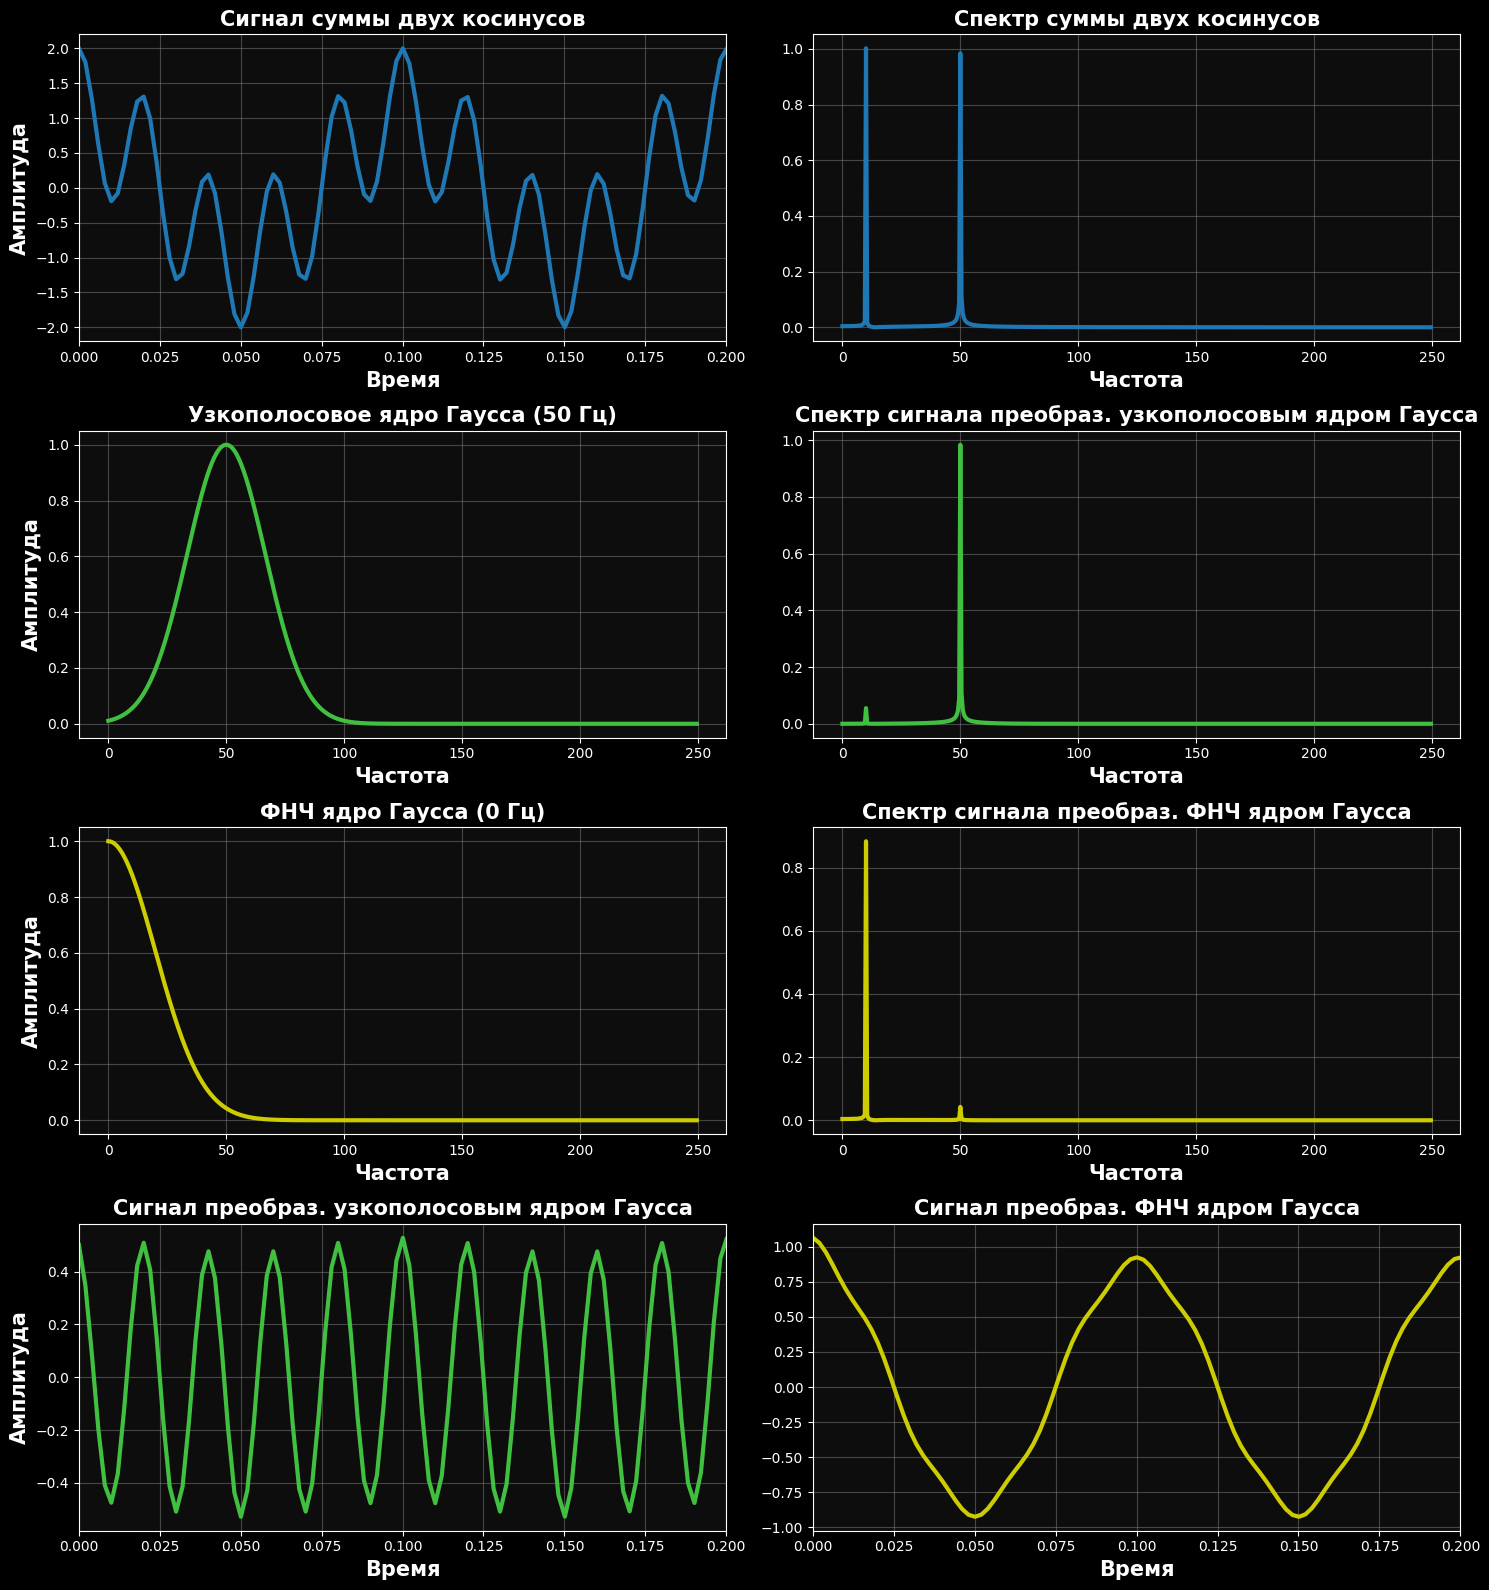

In [165]:
cos_sampling_frequency = 1000

cos_a = 0
cos_b = 2

cos_x_lim_lt = cos_a
cos_x_lim_rt = cos_b / 10

cos_t = np.linspace(cos_a, cos_b, cos_sampling_frequency)
cos_frequencies = np.fft.fftfreq(len(cos_t), 1/cos_sampling_frequency) / (cos_b - cos_a)

# Сигнал из суммы двух косинусов
frequency_cos_1 = 10
frequency_cos_2 = 50

cos_signal = np.cos(2 * np.pi * frequency_cos_1 * cos_t) + np.cos(2 * np.pi * frequency_cos_2 * cos_t)
cos_signal_fft = np.fft.fft(cos_signal)

# Параметры ядра Гаусса для узкополосового фильтра
h_narrow = cos_frequencies
p_narrow = frequency_cos_2
w_narrow = 125
gaussian_function_narrow = function_gaussian_kernel(h_narrow, p_narrow, w_narrow)
gaussian_kernel_narrow_fft = gaussian_function_narrow
cos_signal_narrow_fft = cos_signal_fft * np.abs(gaussian_kernel_narrow_fft)
cos_signal_narrow = np.fft.ifft(cos_signal_narrow_fft).real

# Параметры ядра Гаусса для ФНЧ
h_low_pass = cos_frequencies
p_low_pass = 0
w_low_pass = 150
gaussian_function_low_pass = function_gaussian_kernel(h_low_pass, p_low_pass, w_low_pass)
gaussian_kernel_low_pass_fft = gaussian_function_low_pass
cos_signal_low_pass_fft = cos_signal_fft * np.abs(gaussian_kernel_low_pass_fft)
cos_signal_low_pass = np.fft.ifft(cos_signal_low_pass_fft).real

# Построение графиков
fig, axes = plt.subplots(4, 2, figsize=(15, 16))
(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8) = axes

ax1.plot(cos_t, cos_signal)
ax1.set_xlim(cos_x_lim_lt, cos_x_lim_rt)
ax1.set_title("Сигнал суммы двух косинусов")
ax1.set_xlabel("Время")
ax1.set_ylabel("Амплитуда")

ax2.plot(cos_frequencies[:len(cos_frequencies)//2], np.abs(cos_signal_fft[:len(cos_signal_fft)//2]) * 2 / len(cos_t))
ax2.set_title("Спектр суммы двух косинусов")
ax2.set_xlabel("Частота")

ax3.plot(h_narrow[:len(h_narrow)//2], gaussian_kernel_narrow_fft[:len(gaussian_kernel_narrow_fft)//2], color=green_color)
ax3.set_title(f"Узкополосовое ядро Гаусса ({p_narrow} Гц)")
ax3.set_xlabel("Частота")
ax3.set_ylabel("Амплитуда")

ax4.plot(cos_frequencies[:len(cos_frequencies)//2], np.abs(cos_signal_narrow_fft[:len(cos_signal_narrow_fft)//2]) * 2 / len(cos_t), color=green_color)
ax4.set_title(f"Спектр сигнала преобраз. узкополосовым ядром Гаусса")
ax4.set_xlabel("Частота")

ax5.plot(h_low_pass[:len(h_low_pass)//2], gaussian_kernel_low_pass_fft[:len(gaussian_kernel_low_pass_fft)//2], color=yellow_color)
ax5.set_title(f"ФНЧ ядро Гаусса ({p_low_pass} Гц)")
ax5.set_xlabel("Частота")
ax5.set_ylabel("Амплитуда")

ax6.plot(cos_frequencies[:len(cos_frequencies)//2], np.abs(cos_signal_low_pass_fft[:len(cos_signal_low_pass_fft)//2]) * 2 / len(cos_t), color=yellow_color)
ax6.set_title(f"Спектр сигнала преобраз. ФНЧ ядром Гаусса")
ax6.set_xlabel("Частота")

ax7.plot(cos_t, cos_signal_narrow, color=green_color)
ax7.set_xlim(cos_x_lim_lt, cos_x_lim_rt)
ax7.set_title(f"Cигнал преобраз. узкополосовым ядром Гаусса")
ax7.set_xlabel("Время")
ax7.set_ylabel("Амплитуда")

ax8.plot(cos_t, cos_signal_low_pass, color=yellow_color)
ax8.set_xlim(cos_x_lim_lt, cos_x_lim_rt)
ax8.set_title(f"Cигнал преобраз. ФНЧ ядром Гаусса")
ax8.set_xlabel("Время")

plt.tight_layout()
plt.show()


6, 7

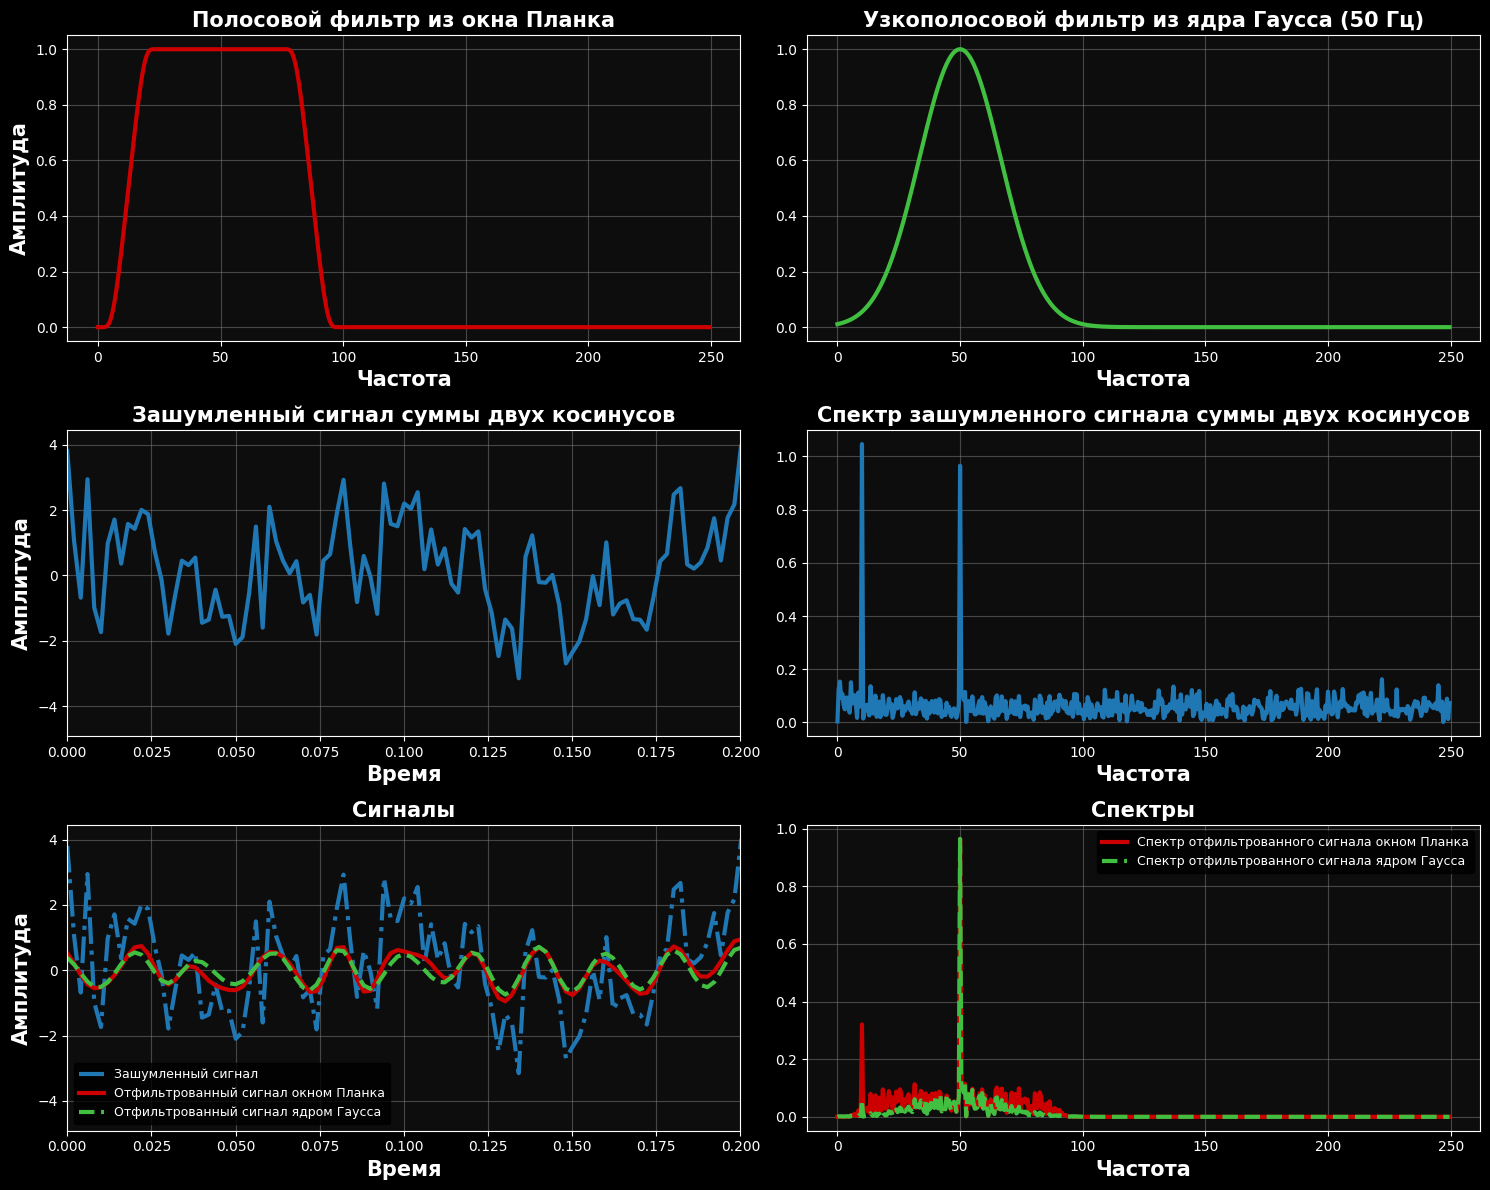

In [166]:
def planck_taper_window(N, epsilon):
    window = np.zeros(N)
    for k in range(N):
        if k == 0 or k == N - 1:
            window[k] = 0
        elif 0 < k < epsilon * (N - 1):
            za = epsilon * (N - 1) * (1 / k + 1 / (k - epsilon * (N - 1)))
            window[k] = 1 / (np.exp(za) + 1)
        elif epsilon * (N - 1) <= k <= (1 - epsilon) * (N - 1):
            window[k] = 1
        elif (1 - epsilon) * (N - 1) < k < N - 1:
            zb = epsilon * (N - 1) * (1 / (N - 1 - k) + 1 / ((1 - epsilon) * (N - 1) - k))
            window[k] = 1 / (np.exp(zb) + 1)
    return window

# Окно Планка для фильтрации
planck_lenght = 100  # Длина N, она влияет на размер окна Планка
planck_top_freq_coeff = 0.25  # Параметр epsilon (от 0 до 0.5), он влияет на гладкость фильтра

planck_window = planck_taper_window(planck_lenght * (cos_b - cos_a), planck_top_freq_coeff)
# (cos_b - cos_a) потому что у нас поменялась реальная частота дискертизации

# Адаптация окна Планка к длине cos_frequencies
planck_window = np.pad(planck_window, (0, max(0, len(cos_frequencies) - len(planck_window))), 'constant')


# Шум
noise_amplitude = 1  # Амплитуда шума
noise = noise_amplitude * np.random.normal(0, 1, len(cos_signal))

noisy_cos_signal = cos_signal + noise
noisy_cos_signal_fft = np.fft.fft(noisy_cos_signal)

# Применение фильтров к зашумленному сигналу
noisy_cos_signal_narrow_fft = noisy_cos_signal_fft * np.abs(gaussian_kernel_narrow_fft)
noisy_cos_signal_planck_fft = noisy_cos_signal_fft * np.abs(planck_window)

noisy_cos_signal_narrow = np.fft.ifft(noisy_cos_signal_narrow_fft).real
noisy_cos_signal_planck = np.fft.ifft(noisy_cos_signal_planck_fft).real

# Графики
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axes

ax1.plot(cos_frequencies[:len(cos_frequencies)//2], planck_window[:len(planck_window)//2], color=red_color)
ax1.set_title("Полосовой фильтр из окна Планка")
ax1.set_xlabel("Частота")
ax1.set_ylabel("Амплитуда")

ax2.plot(h_narrow[:len(h_narrow)//2], gaussian_kernel_narrow_fft[:len(gaussian_kernel_narrow_fft)//2], color=green_color)
ax2.set_title(f"Узкополосовой фильтр из ядра Гаусса ({p_narrow} Гц)")
ax2.set_xlabel("Частота")

ax3.plot(cos_t, noisy_cos_signal)
ax3.set_xlim(cos_x_lim_lt, cos_x_lim_rt)
ax3.set_title("Зашумленный сигнал суммы двух косинусов")
ax3.set_xlabel("Время")
ax3.set_ylabel("Амплитуда")

ax4.plot(cos_frequencies[:len(cos_frequencies)//2], np.abs(noisy_cos_signal_fft[:len(noisy_cos_signal_fft)//2]) * 2 / len(cos_t))
ax4.set_title("Спектр зашумленного сигнала суммы двух косинусов")
ax4.set_xlabel("Частота")

ax5.plot(cos_t, noisy_cos_signal, "-.", label="Зашумленный сигнал")
ax5.plot(cos_t, noisy_cos_signal_planck, color=red_color, label="Отфильтрованный сигнал окном Планка")
ax5.plot(cos_t, noisy_cos_signal_narrow, "--", color=green_color, label="Отфильтрованный сигнал ядром Гаусса")
ax5.set_xlim(cos_x_lim_lt, cos_x_lim_rt)
ax5.set_title("Cигналы")
ax5.set_xlabel("Время")
ax5.set_ylabel("Амплитуда")
ax5.legend()

ax6.plot(cos_frequencies[:len(cos_frequencies)//2],
        np.abs(noisy_cos_signal_planck_fft[:len(noisy_cos_signal_planck_fft)//2]) * 2 / len(cos_t), color=red_color,
        label='Спектр отфильтрованного сигнала окном Планка')
ax6.plot(cos_frequencies[:len(cos_frequencies)//2], 
        np.abs(noisy_cos_signal_narrow_fft[:len(noisy_cos_signal_narrow_fft)//2]) * 2 / len(cos_t), "--", color=green_color,
        label='Спектр отфильтрованного сигнала ядром Гаусса')
ax6.set_title("Спектры")
ax6.set_xlabel("Частота")
ax6.legend()

plt.tight_layout()
plt.show()
